In [1]:
#imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [66]:
df = pd.read_csv("final.csv")
df

,call_id,customer_id,agent_id,call_start_datetime,agent_assigned_datetime,call_end_datetime,call_transcript,agent_tone,customer_tone,average_sentiment,silence_percent_average,primary_call_reason,customer_name,elite_level_code
0,4667960400,2033123310,963118,7/31/2024 23:56,08/01/24 0:03,08/01/24 0:34,\n\nAgent: Thank you for calling United Airlin...,neutral,angry,-0.04,0.39,Voluntary Cancel,Matthew Foster,4.0
1,1122072124,8186702651,519057,08/01/24 0:03,08/01/24 0:06,08/01/24 0:18,\n\nAgent: Thank you for calling United Airlin...,calm,neutral,0.02,0.35,Booking,Tammy Walters,NaN
2,6834291559,2416856629,158319,7/31/2024 23:59,08/01/24 0:07,08/01/24 0:26,\n\nAgent: Thank you for calling United Airlin...,neutral,polite,-0.13,0.32,IRROPS,Jeffery Dixon,NaN
3,2266439882,1154544516,488324,08/01/24 0:05,08/01/24 0:10,08/01/24 0:17,\n\nAgent: Thank you for calling United Airlin...,neutral,frustrated,-0.20,0.20,Upgrade,David Wilkins,2.0
4,1211603231,5214456437,721730,08/01/24 0:04,08/01/24 0:14,08/01/24 0:23,\n\nAgent: Thank you for calling United Airlin...,neutral,polite,-0.05,0.35,Seating,Elizabeth Daniels,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71805,1563273072,8022667294,413148,8/31/2024 23:48,8/31/2024 23:57,09/01/24 0:25,\n\nAgent: Thank you for calling United Airlin...,calm,calm,0.05,0.34,Post Flight,Dennis Singleton DDS,NaN
71806,8865997781,4474867021,980156,8/31/2024 23:55,8/31/2024 23:58,09/01/24 0:06,\n\nAgent: Thank you for calling United Airlin...,calm,frustrated,0.03,0.22,Upgrade,Paul Mitchell,1.0
71807,8019240181,9762042472,616988,8/31/2024 23:52,8/31/2024 23:58,09/01/24 0:04,\n\nAgent: Thank you for calling United Airlin...,calm,polite,0.05,0.42,Upgrade,Kaylee Lang,NaN
71808,8332067080,8095620266,161354,8/31/2024 23:53,8/31/2024 23:59,09/01/24 0:03,\n\nAgent: Thank you for calling United Airlin...,neutral,polite,-0.07,0.13,NaN,Christine Oneal,1.0


In [9]:
# Calculate number of missing values per column
missing_values = df.isnull().sum()
missing_values

call_id                        0
customer_id                    0
agent_id                       0
call_start_datetime            0
agent_assigned_datetime        0
call_end_datetime              0
call_transcript                0
agent_tone                   217
customer_tone                  0
average_sentiment            109
silence_percent_average        0
primary_call_reason         5157
customer_name                  0
elite_level_code           25767
dtype: int64

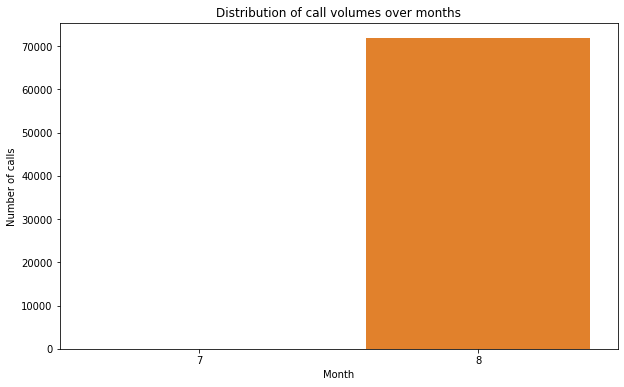

In [51]:
#plot distribution of call volumes over months
plt.figure(figsize=(10,6))
sns.countplot(x='month', data=df)
plt.title('Distribution of call volumes over months')
plt.xlabel('Month')
plt.ylabel('Number of calls')
plt.show()

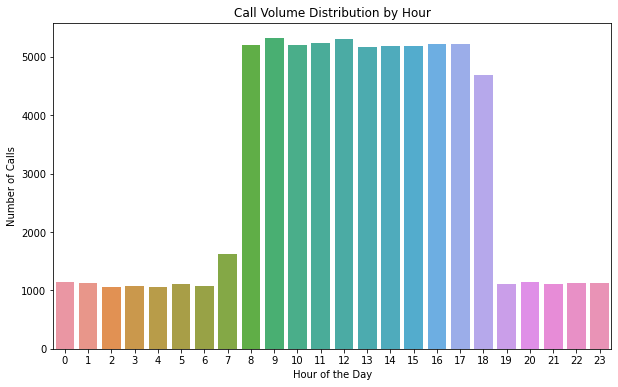

In [11]:
# Plot distribution of calls over hours
plt.figure(figsize=(10, 6))
sns.countplot(x='hour', data=df)
plt.title('Call Volume Distribution by Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Calls')
plt.show()

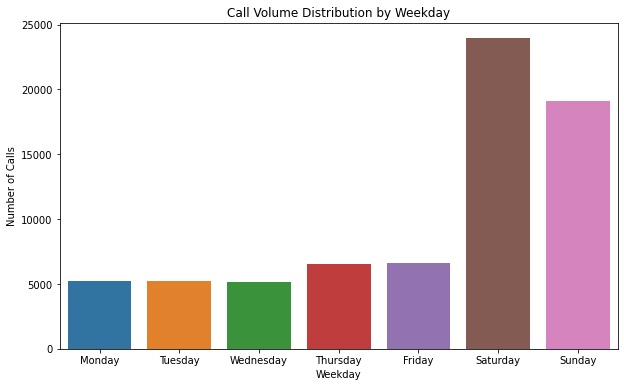

In [12]:
# Plot distribution of calls over weekdays
plt.figure(figsize=(10, 6))
sns.countplot(x='weekday', data=df, order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title('Call Volume Distribution by Weekday')
plt.xlabel('Weekday')
plt.ylabel('Number of Calls')
plt.show()

In [108]:
senti = pd.read_csv("senti.csv")

In [109]:
senti

,call_id,customer_id,agent_id,call_start_datetime,agent_assigned_datetime,call_end_datetime,call_transcript,agent_tone,customer_tone,average_sentiment,...,agent_assigned_duration,hour,time_slot,day_of_week,cleaned_transcript,handle_time,agent_dialogues,customer_dialogues,agent_sentiment_score,customer_sentiment_score
0,4667960400,2033123310,963118,2024-07-31 23:56:00,2024-08-01 00:03:00,2024-08-01 00:34:00,\n\nAgent: Thank you for calling United Airlin...,0.146025,0.136689,-0.04,...,7.0,23,Evening,2,Agent: Thank you for calling United Airlines c...,31.0,Thank you for calling United Airlines customer...,"Hi, yeah I'm calling because my flight from Ch...",0.138004,0.128586
1,1122072124,8186702651,519057,2024-08-01 00:03:00,2024-08-01 00:06:00,2024-08-01 00:18:00,\n\nAgent: Thank you for calling United Airlin...,0.298106,0.209670,0.02,...,3.0,0,Midnight,3,"Agent: Thank you for calling United Airlines, ...",12.0,"Thank you for calling United Airlines, my name...","Hi Sam, yeah I'm calling because I need to cha...",0.247822,0.182844
2,6834291559,2416856629,158319,2024-07-31 23:59:00,2024-08-01 00:07:00,2024-08-01 00:26:00,\n\nAgent: Thank you for calling United Airlin...,0.214473,0.146146,-0.13,...,8.0,23,Evening,2,Agent: Thank you for calling United Airlines c...,19.0,Thank you for calling United Airlines customer...,"Hi Steve, uh, I'm calling because I need to ma...",0.298103,0.247222
3,2266439882,1154544516,488324,2024-08-01 00:05:00,2024-08-01 00:10:00,2024-08-01 00:17:00,\n\nAgent: Thank you for calling United Airlin...,0.180633,0.013264,-0.20,...,5.0,0,Midnight,3,Agent: Thank you for calling United Airlines c...,7.0,Thank you for calling United Airlines customer...,"Hi, yeah I'm calling because I'm having some i...",0.104825,0.037843
4,1211603231,5214456437,721730,2024-08-01 00:04:00,2024-08-01 00:14:00,2024-08-01 00:23:00,\n\nAgent: Thank you for calling United Airlin...,0.293035,0.196875,-0.05,...,10.0,0,Midnight,3,Agent: Thank you for calling United Airlines c...,9.0,Thank you for calling United Airlines customer...,"Hi Sarah, thanks for taking my call. I'm calli...",0.353121,0.216228
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71805,1563273072,8022667294,413148,2024-08-31 23:48:00,2024-08-31 23:57:00,2024-09-01 00:25:00,\n\nAgent: Thank you for calling United Airlin...,0.303925,0.140000,0.05,...,9.0,23,Evening,5,Agent: Thank you for calling United Airlines c...,28.0,Thank you for calling United Airlines customer...,"Hi Dave, yeah I'm calling in about a flight I ...",0.290341,0.211667
71806,8865997781,4474867021,980156,2024-08-31 23:55:00,2024-08-31 23:58:00,2024-09-01 00:06:00,\n\nAgent: Thank you for calling United Airlin...,0.073876,0.118074,0.03,...,3.0,23,Evening,5,Agent: Thank you for calling United Airlines c...,8.0,Thank you for calling United Airlines customer...,"Hi, yeah I'm calling because I'm really not ha...",0.113465,0.125758
71807,8019240181,9762042472,616988,2024-08-31 23:52:00,2024-08-31 23:58:00,2024-09-01 00:04:00,\n\nAgent: Thank you for calling United Airlin...,0.099619,0.201121,0.05,...,6.0,23,Evening,5,Agent: Thank you for calling United Airlines c...,6.0,Thank you for calling United Airlines customer...,"Hi Steven, umm I was hoping you could help me ...",0.250126,0.247424
71808,8332067080,8095620266,161354,2024-08-31 23:53:00,2024-08-31 23:59:00,2024-09-01 00:03:00,\n\nAgent: Thank you for calling United Airlin...,0.316637,0.135417,-0.07,...,6.0,23,Evening,5,Agent: Thank you for calling United Airlines c...,4.0,Thank you for calling United Airlines customer...,"Hi Kelly, umm.. I'm calling about a flight I h...",0.391797,0.173611


### Sentiment Scores

Since we were given only the average sentiment, we calculated the sentiments for the Agents and Customers seperately for each call. This was because the avg is likely to be around 0 as Agents usually maintain a neutral tone regardless of if the customer is Angry/Frustrated or Happy.

In [126]:
# Function to separate agent and customer dialogues
def separate_dialogues(transcript):
    agent_dialogues = []
    customer_dialogues = []

    # Split the transcript into individual parts based on 'Agent:' or 'Customer:'
    lines = re.split(r'(Agent:|Customer:)', transcript)

    # Track the current speaker
    current_speaker = None

    # Iterate through the lines to separate agent and customer dialogues
    for line in lines:
        if line == 'Agent:':
            current_speaker = 'Agent'
        elif line == 'Customer:':
            current_speaker = 'Customer'
        elif current_speaker == 'Agent':
            agent_dialogues.append(line.strip())
        elif current_speaker == 'Customer':
            customer_dialogues.append(line.strip())

    # Concatenate all dialogues for each speaker to provide context
    return " ".join(agent_dialogues), " ".join(customer_dialogues)

senti[['agent_dialogues', 'customer_dialogues']] = senti['call_transcript'].apply(lambda x: pd.Series(separate_dialogues(x)))

In [ ]:
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer

# Download the VADER lexicon (only needed once)
nltk.download('vader_lexicon')

def analyze_sentiment(transcript):
    # Split the transcript into sentences
    sentences = transcript.split('.')
    
    # Initialize the VADER sentiment analyzer
    sia = SentimentIntensityAnalyzer()
    
    # Analyze sentiment for each sentence
    sentiments = []
    for sentence in sentences:
        sentiment = sia.polarity_scores(sentence)
        sentiments.append(sentiment['compound'])

    # Calculate the average sentiment for the entire transcript
    average_sentiment = np.mean(sentiments)

    return average_sentiment

# Analyze sentiment for agent and customer dialogues
senti['agent_sentiment_score'] = senti['agent_dialogues'].apply(analyze_sentiment)
senti['customer_sentiment_score'] = senti['customer_dialogues'].apply(analyze_sentiment)

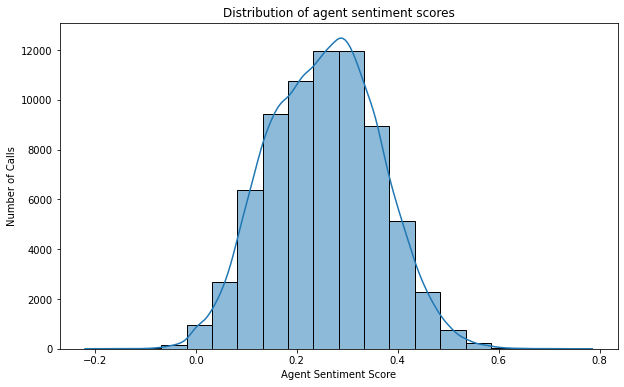

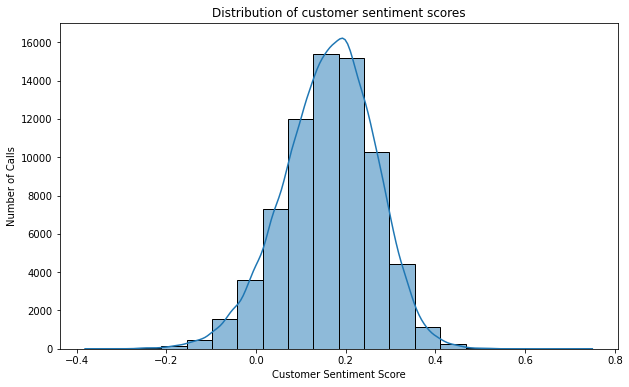

In [112]:
# Distribution of sentiment scores: agent_sentiment_score and customer_sentiment_score
plt.figure(figsize=(10,6))
sns.histplot(senti['agent_sentiment_score'], bins=20, kde=True)
plt.title('Distribution of agent sentiment scores')
plt.xlabel('Agent Sentiment Score')
plt.ylabel('Number of Calls')
plt.show()

plt.figure(figsize=(10,6))
sns.histplot(senti['customer_sentiment_score'], bins=20, kde=True)
plt.title('Distribution of customer sentiment scores')
plt.xlabel('Customer Sentiment Score')
plt.ylabel('Number of Calls')
plt.show()

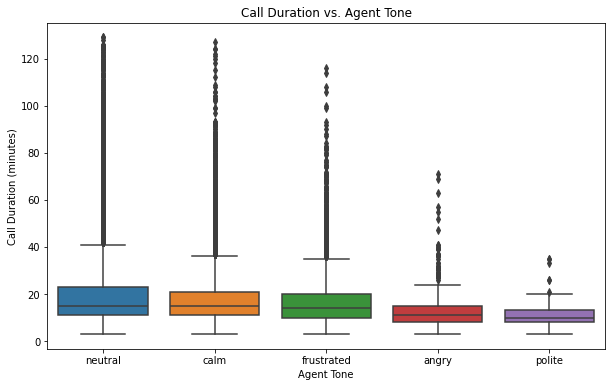

In [14]:
# Boxplot of call durations based on agent tone
plt.figure(figsize=(10, 6))
sns.boxplot(x='agent_tone', y='call_duration', data=df)
plt.title('Call Duration vs. Agent Tone')
plt.xlabel('Agent Tone')
plt.ylabel('Call Duration (minutes)')
plt.show()

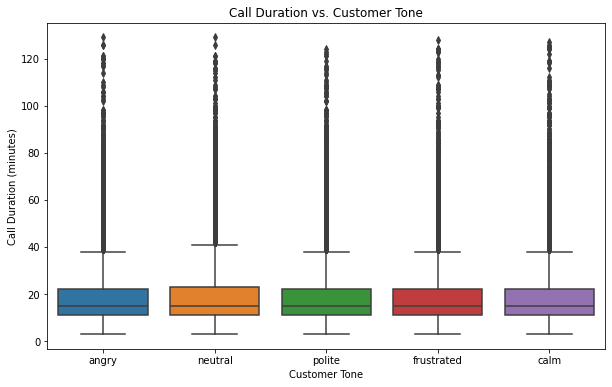

In [15]:
# Boxplot of call durations based on customer tone
plt.figure(figsize=(10, 6))
sns.boxplot(x='customer_tone', y='call_duration', data=df)
plt.title('Call Duration vs. Customer Tone')
plt.xlabel('Customer Tone')
plt.ylabel('Call Duration (minutes)')
plt.show()

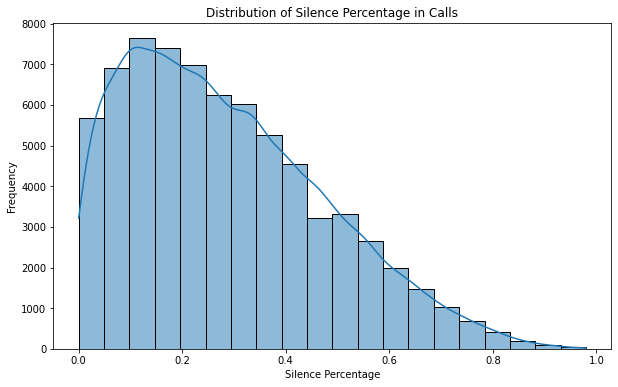

In [16]:
# Distribution of silence percentage
plt.figure(figsize=(10, 6))
sns.histplot(df['silence_percent_average'], bins=20, kde=True)
plt.title('Distribution of Silence Percentage in Calls')
plt.xlabel('Silence Percentage')
plt.ylabel('Frequency')
plt.show()

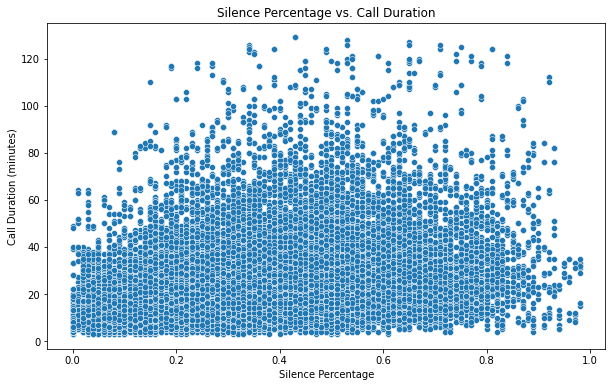

In [17]:
# Correlation between silence percentage and call duration
plt.figure(figsize=(10, 6))
sns.scatterplot(x='silence_percent_average', y='call_duration', data=df)
plt.title('Silence Percentage vs. Call Duration')
plt.xlabel('Silence Percentage')
plt.ylabel('Call Duration (minutes)')
plt.show()

In [114]:
# Function to clean call reasons
def clean_call_reason(reason):
    if pd.isna(reason):
        return 'Unknown'  # Replace NaNs with 'Unknown' or keep as NaN if preferred
    
    # Standardize spaces, convert to lowercase, and remove inconsistent hyphens
    cleaned = reason.strip().lower()
    cleaned = ' '.join(cleaned.split())  # Replace multiple spaces with a single space
    cleaned = cleaned.replace('&', 'and')  # Replace '&' with 'and' for consistency
    cleaned = cleaned.replace(' - ', '-')  # Standardize spaces around hyphens
    cleaned = cleaned.replace('  ', ' ')  # Remove any double spaces left

    # Replace similar terms with a unified version
    replacements = {
        'check in': 'check-in',
        'checkin': 'check-in',
        'post flight': 'post-flight',
        'post-flight': 'post-flight',
        'voluntary cancel': 'voluntary cancel',
        'voluntary change': 'voluntary change',
        'mileage plus': 'mileage plus',
        'other topics': 'other topics',
        'schedule change': 'schedule change',
        'products & services': 'products and services',
        'products services': 'products and services',
        'products and services': 'products and services',
        'digital support': 'digital support',
        'traveler updates': 'traveler updates',
        'irrops': 'irrops',
        'baggage': 'baggage',
        'disability': 'disability',
        'upgrade': 'upgrade',
        'seating': 'seating',
        'checkout': 'checkout',
        'postflight': 'post-flight',
        'etc': 'other topics',
        'communications': 'communications',
        'unaccompanied minor': 'unaccompanied minor'
    }
    # Apply replacements
    cleaned = replacements.get(cleaned, cleaned)
    return cleaned

# Apply the cleaning function to the column
senti['primary_call_reason_cleaned'] = senti['primary_call_reason'].apply(clean_call_reason)

# View unique cleaned call reasons
print(senti['primary_call_reason_cleaned'].unique())

['voluntary cancel' 'booking' 'irrops' 'upgrade' 'seating' 'mileage plus'
 'checkout' 'Unknown' 'voluntary change' 'post-flight' 'check-in'
 'other topics' 'communications' 'schedule change' 'products and services'
 'digital support' 'disability' 'unaccompanied minor' 'baggage'
 'traveler updates']


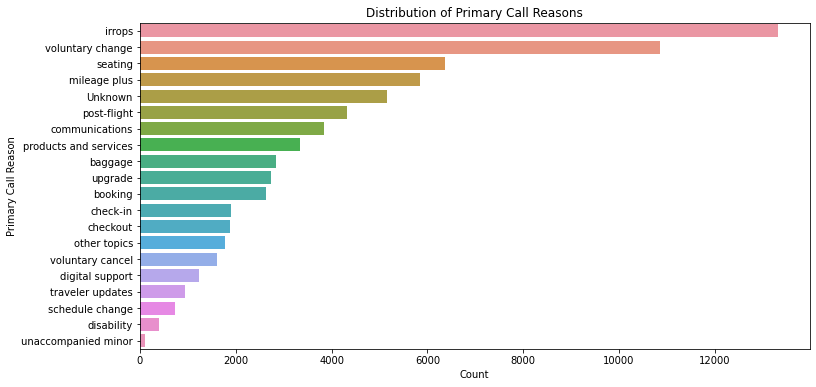

In [115]:
# Distribution of primary call reasons
plt.figure(figsize=(12, 6))
sns.countplot(y='primary_call_reason_cleaned', data=senti, order=senti['primary_call_reason_cleaned'].value_counts().index)
plt.title('Distribution of Primary Call Reasons')
plt.xlabel('Count')
plt.ylabel('Primary Call Reason')
plt.show()

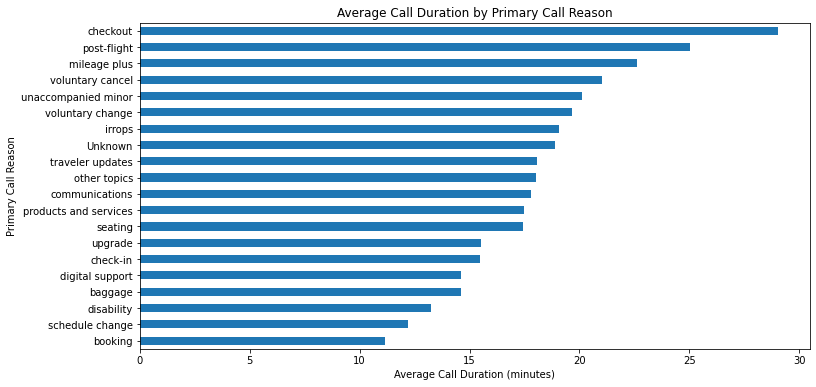

In [116]:
# Average call duration by primary call reason
call_reason_duration = senti.groupby('primary_call_reason_cleaned')['call_duration'].mean().sort_values()
plt.figure(figsize=(12, 6))
call_reason_duration.plot(kind='barh')
plt.title('Average Call Duration by Primary Call Reason')
plt.xlabel('Average Call Duration (minutes)')
plt.ylabel('Primary Call Reason')
plt.show()

There are two entries in post-flight that are of 129 min (~40% silent time) which might be increasing the avg

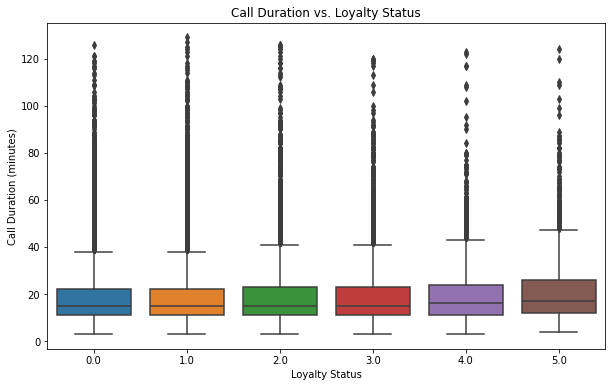

In [21]:
# Boxplot of call durations based on loyalty status
plt.figure(figsize=(10, 6))
sns.boxplot(x='elite_level_code', y='call_duration', data=df)
plt.title('Call Duration vs. Loyalty Status')
plt.xlabel('Loyalty Status')
plt.ylabel('Call Duration (minutes)')
plt.show()

In [69]:
df['AHT'] = (pd.to_datetime(df['call_end_datetime']) - pd.to_datetime(df['agent_assigned_datetime'])).dt.total_seconds()
plt.figure(figsize=(10, 6))
sns.histplot(df['AHT'], bins=30, kde=True)
plt.title('Distribution of Average Handle Time (AHT)')
plt.xlabel('AHT (seconds)')
plt.show()

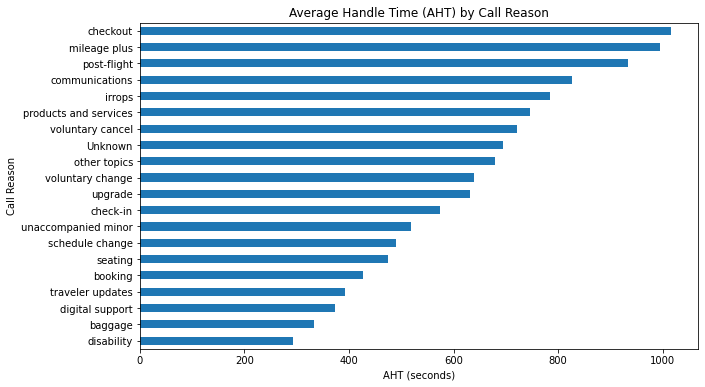

In [28]:
aht_by_reason = df.groupby('primary_call_reason_cleaned')['AHT'].mean().sort_values()
plt.figure(figsize=(10, 6))
aht_by_reason.plot(kind='barh')
plt.title('Average Handle Time (AHT) by Call Reason')
plt.xlabel('AHT (seconds)')
plt.ylabel('Call Reason')
plt.show()

# Question 1

In [70]:
#fill nan in customer loyalty status with 0
senti['elite_level_code'] = senti['elite_level_code'].fillna(0)

In [117]:
senti['call_type_frequency'] = senti.groupby('primary_call_reason_cleaned')['primary_call_reason_cleaned'].transform('count')

In [118]:
#df columns
senti.columns

Index(['call_id', 'customer_id', 'agent_id', 'call_start_datetime',
       'agent_assigned_datetime', 'call_end_datetime', 'call_transcript',
       'agent_tone', 'customer_tone', 'average_sentiment',
       'silence_percent_average', 'primary_call_reason', 'customer_name',
       'elite_level_code', 'call_duration', 'agent_assigned_duration', 'hour',
       'time_slot', 'day_of_week', 'cleaned_transcript', 'handle_time',
       'agent_dialogues', 'customer_dialogues', 'agent_sentiment_score',
       'customer_sentiment_score', 'primary_call_reason_cleaned',
       'call_type_frequency'],
      dtype='object')

In [124]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import re

In [119]:
#get numerical values for categorical columns label encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
senti['primary_call_reason_cleaned'] = le.fit_transform(senti['primary_call_reason_cleaned'])
senti['agent_tone'] = le.fit_transform(senti['agent_tone'])
senti['customer_tone'] = le.fit_transform(senti['customer_tone'])

In [142]:
#nan counts
senti.isnull().sum()

call_id                           0
customer_id                       0
agent_id                          0
call_start_datetime               0
agent_assigned_datetime           0
call_end_datetime                 0
call_transcript                   0
agent_tone                        0
customer_tone                     0
average_sentiment               109
silence_percent_average           0
primary_call_reason            5157
customer_name                     0
elite_level_code                  0
call_duration                     0
agent_assigned_duration           0
hour                              0
time_slot                         0
day_of_week                       0
cleaned_transcript               28
handle_time                       0
primary_call_reason_cleaned       0
call_type_frequency               0
agent_dialogues                   0
customer_dialogues                0
agent_sentiment_score             0
customer_sentiment_score          0
dtype: int64

### Analysing Busy Vs Non- Busy Periods

In [151]:
call_volume_per_hour = senti.groupby('hour').size()
threshold = call_volume_per_hour.mean() + call_volume_per_hour.std()
senti['busy_period'] = senti['hour'].apply(lambda x: 1 if call_volume_per_hour[x] > threshold else 0)

1    52273
0    19537
Name: busy_period, dtype: int64

# AHT

In [153]:
# Prepare features and target
X = senti[['agent_id', 'busy_period', 'agent_tone', 'customer_tone', 'agent_sentiment_score', 'customer_sentiment_score', 'silence_percent_average', 'primary_call_reason_cleaned', 'elite_level_code', 'agent_assigned_duration', 'hour', 'day_of_week']]
y = senti['handle_time']

Random Forest R^2 Score: 0.16979211459343835
Random Forest RMSE: 11.842526054575242


c:\Users\Avishi\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


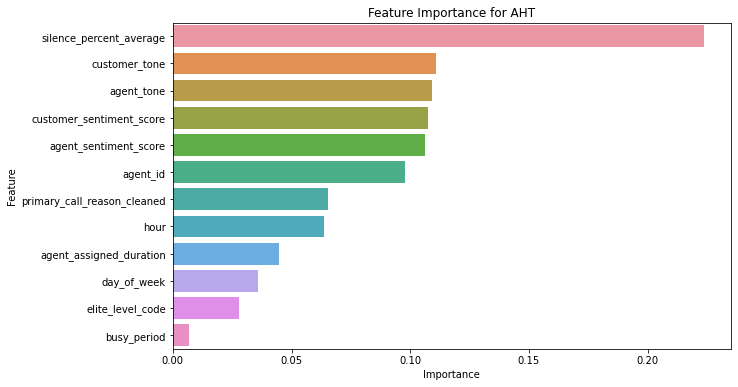

In [154]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
print("Random Forest R^2 Score:", r2_score(y_test, y_pred_rf))
print("Random Forest RMSE:", mean_squared_error(y_test, y_pred_rf, squared=False))

# Feature Importance
importances = rf_model.feature_importances_
feature_names = X.columns
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

#plot
plt.figure(figsize=(10, 6))
sns.set_palette('viridis')
sns.barplot(data=importance_df, x='Importance', y='Feature')
plt.title('Feature Importance for AHT')
plt.show()

# busy vs non busy

In [163]:
# Separate the data into busy and non-busy periods
busy_df = senti[senti['busy_period'] == 1]
non_busy_df = senti[senti['busy_period'] == 0]

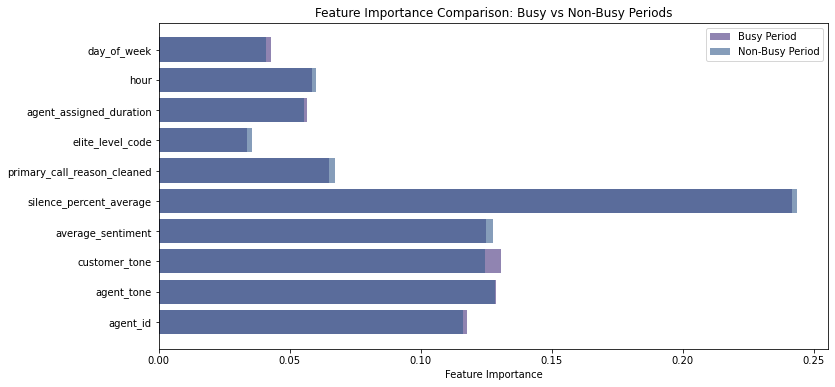

Busy Period - RMSE: 11.491865147658807, R^2: 0.1953311214991741
Non-Busy Period - RMSE: 11.331841620801779, R^2: 0.16566480036012465


In [165]:
features = ['agent_id', 'agent_tone', 'customer_tone', 'average_sentiment', 'silence_percent_average', 
            'primary_call_reason_cleaned', 'elite_level_code', 'agent_assigned_duration', 'hour', 'day_of_week']
target = 'handle_time'

# Function to train and evaluate a model
def evaluate_model(data, features, target):
    X = pd.get_dummies(data[features], drop_first=True)
    y = data[target]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    rf = RandomForestRegressor(n_estimators=100, random_state=42)
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)

    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    feature_importances = rf.feature_importances_

    return rmse, r2, feature_importances, X.columns

# Evaluate models for busy and non-busy periods
busy_rmse, busy_r2, busy_importances, feature_names = evaluate_model(busy_df, features, target)
non_busy_rmse, non_busy_r2, non_busy_importances, _ = evaluate_model(non_busy_df, features, target)

# Compare feature importances
plt.figure(figsize=(12, 6))
plt.barh(feature_names, busy_importances, alpha=0.6, label='Busy Period')
plt.barh(feature_names, non_busy_importances, alpha=0.6, label='Non-Busy Period')
plt.xlabel('Feature Importance')
plt.title('Feature Importance Comparison: Busy vs Non-Busy Periods')
plt.legend()
plt.show()

# Print evaluation results
print(f"Busy Period - RMSE: {busy_rmse}, R^2: {busy_r2}")
print(f"Non-Busy Period - RMSE: {non_busy_rmse}, R^2: {non_busy_r2}")

# AST

In [169]:
# Prepare features and target
X = senti[['agent_id', 'elite_level_code', 'hour', 'day_of_week', 'busy_period']]
y = senti['agent_assigned_duration']

Random Forest R^2 Score: -0.24629891755026811
Random Forest RMSE: 2.802360192722847


c:\Users\Avishi\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


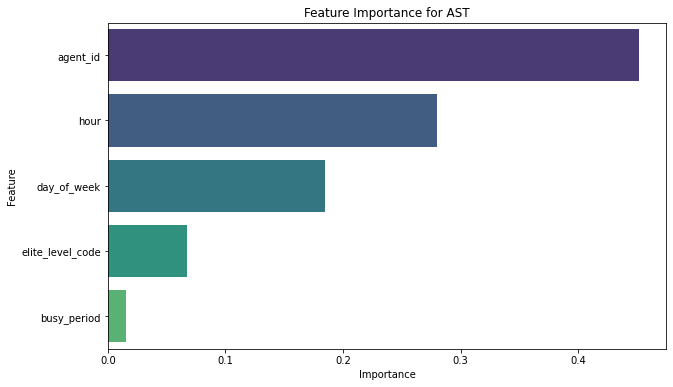

In [170]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
print("Random Forest R^2 Score:", r2_score(y_test, y_pred_rf))
print("Random Forest RMSE:", mean_squared_error(y_test, y_pred_rf, squared=False))

# Feature Importance
importances = rf_model.feature_importances_
feature_names = X.columns
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.set_palette('viridis')
sns.barplot(data=importance_df, x='Importance', y='Feature')
plt.title('Feature Importance for AST')
plt.show()

### Busy Vs Non-busy

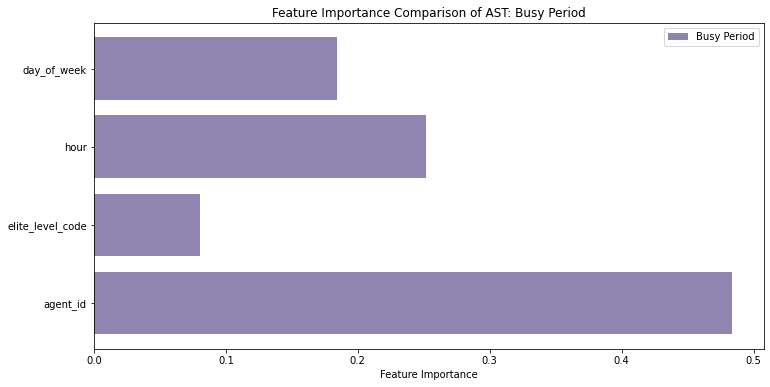

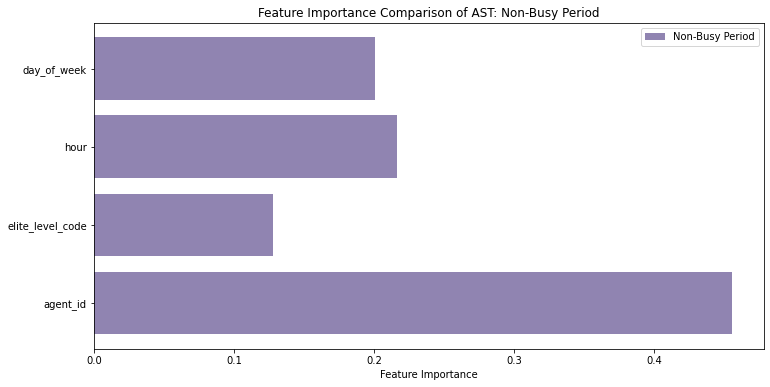

In [173]:
#seperate for vusy and non busy periods - ast
features = ['agent_id', 'elite_level_code', 'hour', 'day_of_week']
target = 'agent_assigned_duration'

# Evaluate models for busy and non-busy periods
busy_rmse, busy_r2, busy_importances, feature_names = evaluate_model(busy_df, features, target)
non_busy_rmse, non_busy_r2, non_busy_importances, _ = evaluate_model(non_busy_df, features, target)

# Compare feature importances - seperate plots, sort ascending
plt.figure(figsize=(12, 6))
plt.barh(feature_names, busy_importances, alpha=0.6, label='Busy Period')
plt.xlabel('Feature Importance')
plt.title('Feature Importance Comparison of AST: Busy Period')
plt.legend()
plt.show()

plt.figure(figsize=(12, 6))
plt.barh(feature_names, non_busy_importances, alpha=0.6, label='Non-Busy Period')
plt.xlabel('Feature Importance')
plt.title('Feature Importance Comparison of AST: Non-Busy Period')
plt.legend()
plt.show()

In [100]:
#number of diff agent id
senti['agent_id'].nunique()

383

# Finding the Percentage diff in AHT

In [172]:
# Get the most and least frequent call reasons
most_frequent_call_reason = senti['primary_call_reason_cleaned'].value_counts().idxmax()
least_frequent_call_reason = senti['primary_call_reason_cleaned'].value_counts().idxmin()

# Calculate average AHT for these reasons
aht_most_freq = senti[senti['primary_call_reason_cleaned'] == most_frequent_call_reason]['handle_time'].mean()
aht_least_freq = senti[senti['primary_call_reason_cleaned'] == least_frequent_call_reason]['handle_time'].mean()

# Percentage difference calculation
percentage_difference = ((aht_most_freq - aht_least_freq) / aht_most_freq) * 100
print(f"Percentage Difference in AHT: {percentage_difference:.2f}%")


Percentage Difference in AHT: 33.87%


### Seeing if Agent ID has an influence on AHT and AST

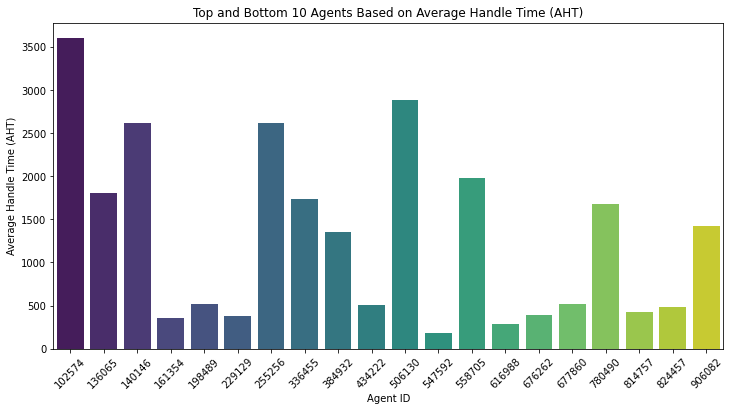

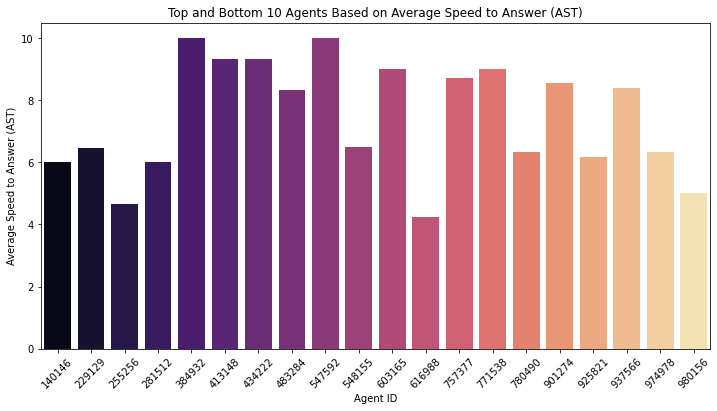

In [101]:
# Grouping the data by agent_id to calculate the average AHT and AST per agent
agent_stats = senti.groupby('agent_id').agg(
    avg_AHT=('handle_time', 'mean'),
    avg_AST=('agent_assigned_duration', 'mean')
).reset_index()

# Sorting to find the top and bottom 10 agents based on average AHT
top_10_AHT_agents = agent_stats.nlargest(10, 'avg_AHT')
bottom_10_AHT_agents = agent_stats.nsmallest(10, 'avg_AHT')

# Sorting to find the top and bottom 10 agents based on average AST
top_10_AST_agents = agent_stats.nlargest(10, 'avg_AST')
bottom_10_AST_agents = agent_stats.nsmallest(10, 'avg_AST')

# Merging to create DataFrames for top and bottom AHT and AST agents
top_agents = pd.concat([top_10_AHT_agents, bottom_10_AHT_agents])
top_AST_agents = pd.concat([top_10_AST_agents, bottom_10_AST_agents])

# Plotting AHT distributions for top and bottom agents
plt.figure(figsize=(12, 6))
sns.barplot(x='agent_id', y='avg_AHT', data=top_agents, palette='viridis')
plt.title('Top and Bottom 10 Agents Based on Average Handle Time (AHT)')
plt.xlabel('Agent ID')
plt.ylabel('Average Handle Time (AHT)')
plt.xticks(rotation=45)
plt.show()

While AST is almost similar, AHT varies quite a bit. Hence we can conclude that agents play a vital role on the AHT

In [102]:
top_10_AHT_agents

,agent_id,avg_AHT,avg_AST
0,102574,3600.0,8.000000
160,506130,2880.0,7.000000
16,140146,2620.0,6.000000
60,255256,2620.0,4.666667
187,558705,1980.0,7.000000
13,136065,1800.0,7.000000
91,336455,1740.0,8.000000
280,780490,1680.0,6.333333
343,906082,1420.0,8.222222
115,384932,1350.0,10.000000


In [103]:
bottom_10_AHT_agents

,agent_id,avg_AHT,avg_AST
184,547592,180.000000,10.000000
210,616988,285.000000,4.250000
23,161354,360.000000,7.000000
48,229129,373.333333,6.444444
238,676262,390.000000,7.500000
299,814757,427.826087,6.869565
306,824457,483.333333,6.944444
138,434222,510.000000,9.333333
239,677860,512.727273,7.333333
39,198489,512.830189,6.754717
